In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [84]:
Diab= pd.read_csv('diabetic_data.csv')

In [85]:
Diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [86]:
Diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [87]:
#removing id columns
Diab.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [88]:
list_unique_columns=[]
for i in Diab.columns:
    if len(Diab[i].value_counts())==1:
        list_unique_columns.append(i)
for i in list_unique_columns:
    Diab.drop([i],axis=1,inplace=True)

In [89]:
#replace ? with nan
Diab=Diab.replace('?',np.nan) 

In [90]:
#missing value function
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing_data(Diab)['Percent'].sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
miglitol                     0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
tolazamide                   0.000000
troglitazone                 0.000000
glimepiride                  0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
acetohexamide                0.000000
repaglinide 

# NULL HANDLING

In [92]:
#weight column since it has more missing value 
Diab['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [93]:
Diab['has_weight']=Diab['weight'].notnull().astype('int')
Diab.drop(['weight'],axis=1,inplace=True)

In [94]:
Diab['medical_specialty'].isnull().sum()
Diab['medical_specialty']=Diab['medical_specialty'].fillna('UNK') #filling null with unk
print(Diab['medical_specialty'].nunique()) #more categories

73


In [95]:
print(Diab['medical_specialty'].value_counts())

UNK                              49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


In [96]:
top_10=['UNK','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        'Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

Diab.loc[~Diab['medical_specialty'].isin(top_10),'medical_specialty']='Other'

In [97]:
print(Diab['payer_code'].isnull().sum())

print(Diab['payer_code'].value_counts())

Diab['payer_code']=Diab['payer_code'].fillna('UNK') #filling null with unk

40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


In [98]:
Diab['race'].isnull().sum()
Diab['race'].value_counts()

Diab['race']=Diab['race'].fillna('UNK') #filling null with unk

Features Engeneering

In [99]:
#Generating output variable
#we need to check whether a patient admitted within 30 days or not
Diab['target']=(Diab['readmitted']=='<30').astype('int')

#dropping readmitted column
Diab.drop(['readmitted'],axis=1,inplace=True)

In [100]:
print(Diab['age'].value_counts())

cleanup_age = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
    "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

Diab.replace(cleanup_age, inplace=True)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [101]:
#analyzing gender column
Diab['gender'].value_counts()
#removing invalid/unknown entries for gender
Diab=Diab[Diab['gender']!='Unknown/Invalid']

# EDA 

# DATA VISUALIZATION

Text(0.5, 1.0, 'Distrinution of Readmission')

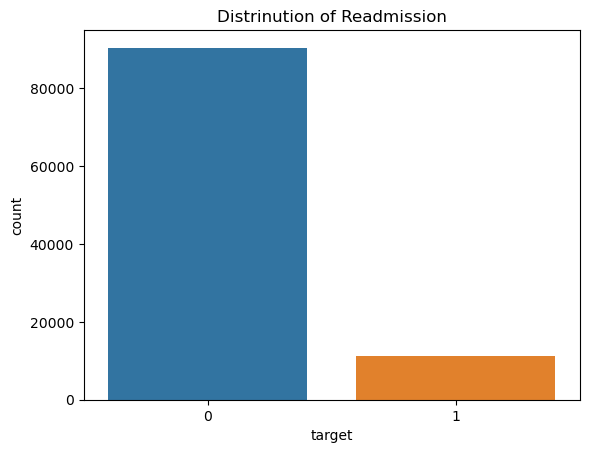

In [102]:
#Distribution of Readmission
sns.countplot(Diab['target']).set_title('Distrinution of Readmission')

In [103]:
#checking for balance data
print(sum(Diab['target'].values)/len(Diab['target'].values)) 

0.11160244882717688


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

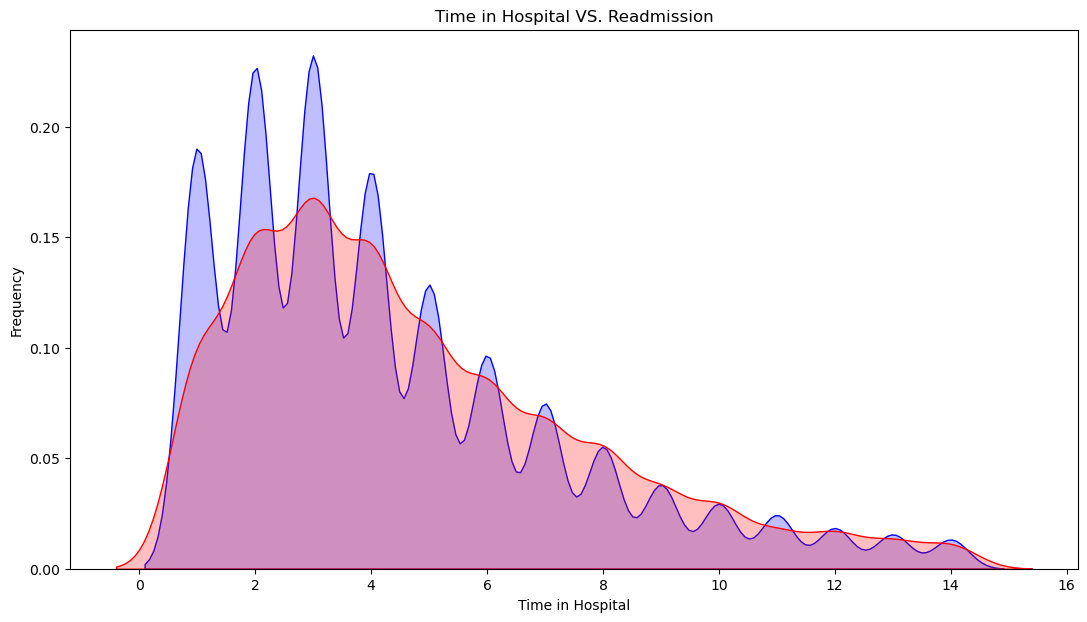

In [104]:
#time in hospital vs readmitted
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(Diab.loc[(Diab['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(Diab.loc[(Diab['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

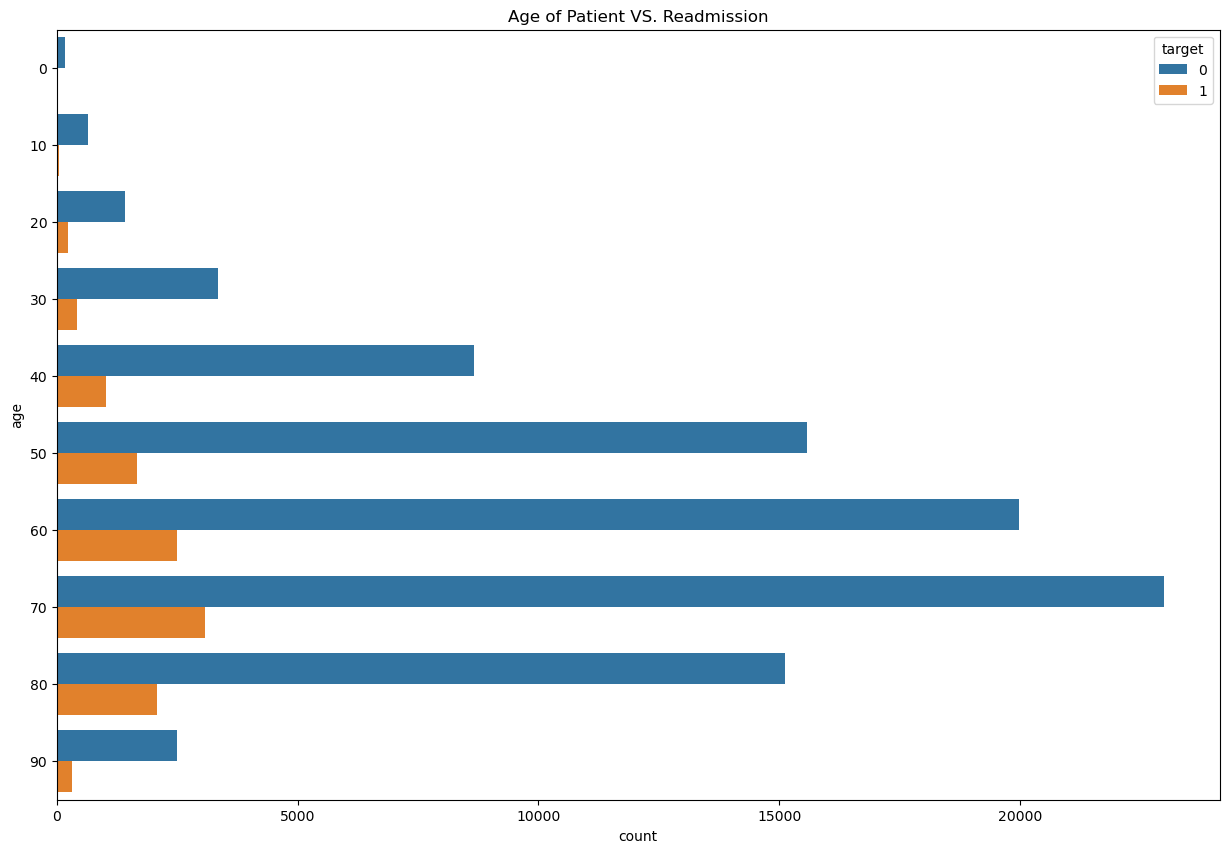

In [105]:
#age vs readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= Diab['age'], hue = Diab['target']).set_title('Age of Patient VS. Readmission')

<AxesSubplot:xlabel='count', ylabel='race'>

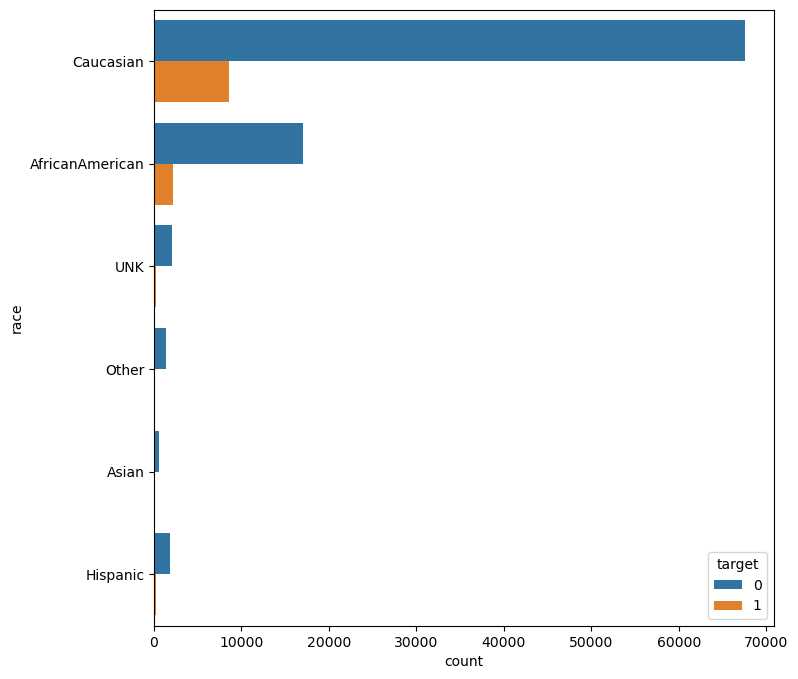

In [106]:
#race vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = Diab['race'], hue = Diab['target'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

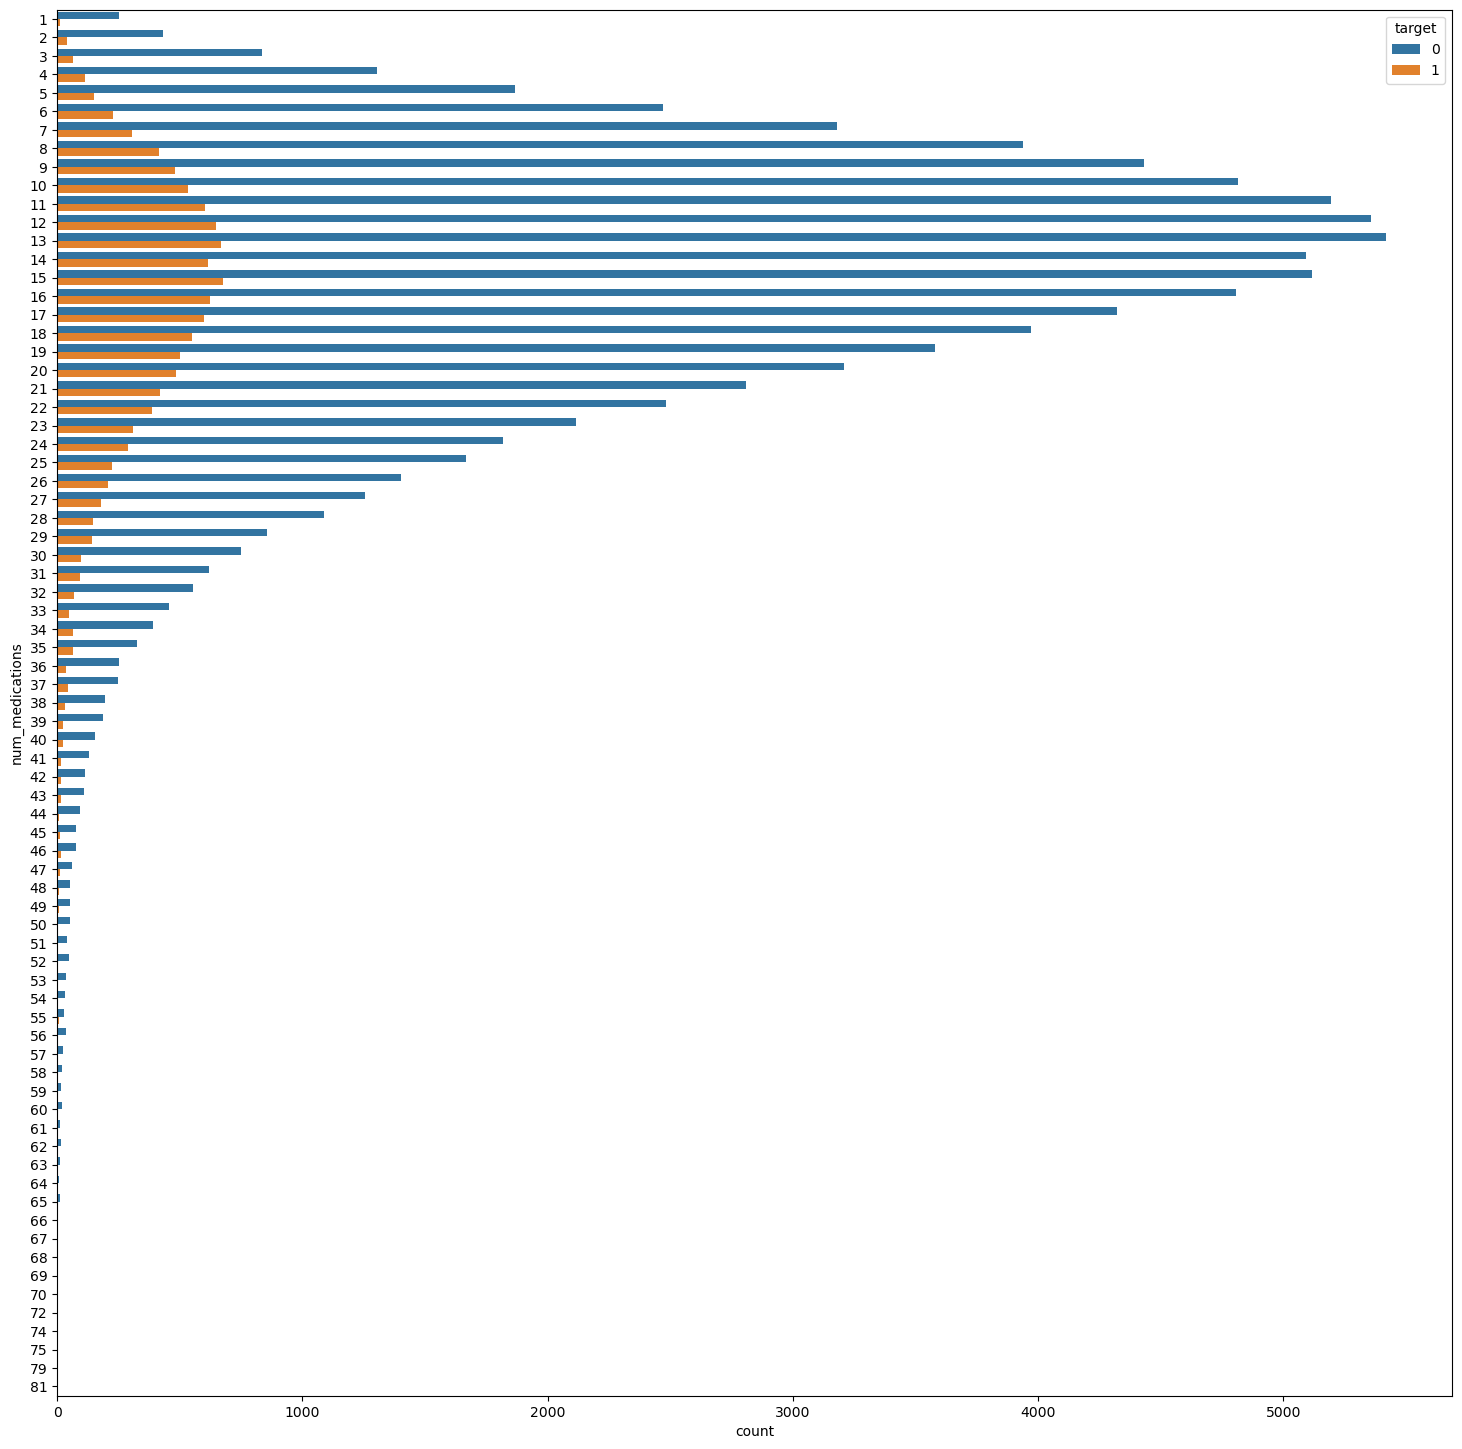

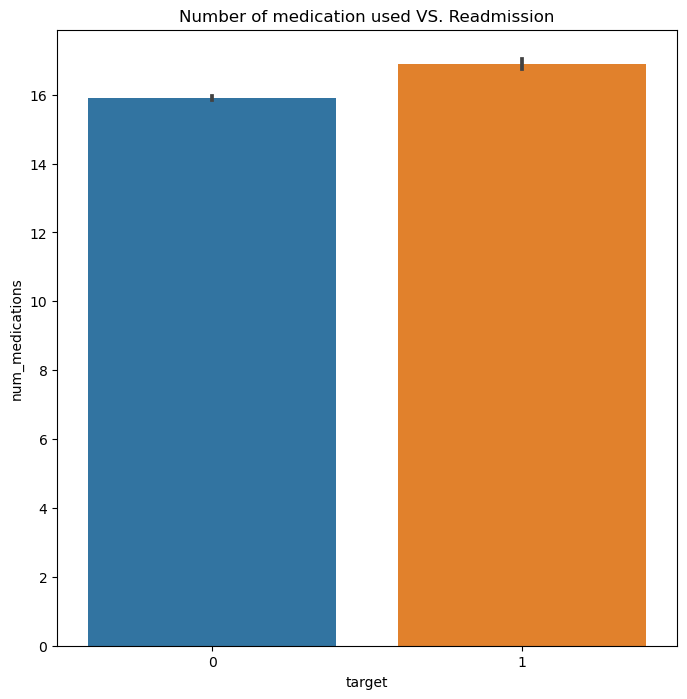

In [107]:
#Number of medication used VS. Readmission
fig = plt.figure(figsize=(18,18))
sns.countplot(y = Diab['num_medications'], hue = Diab['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = Diab['target'], y = Diab['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

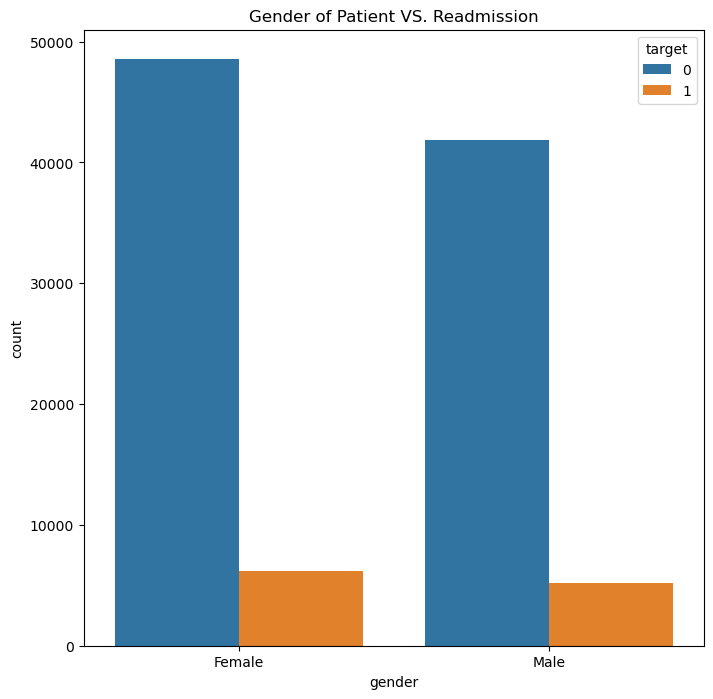

In [43]:
#Gender and Readmission
#Male = 1
#Female = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(Diab['gender'], hue = Diab['target']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

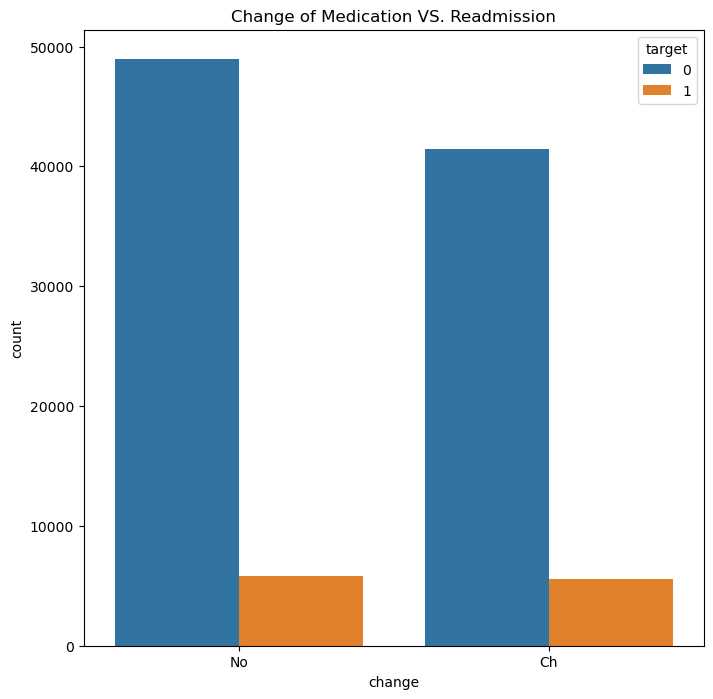

In [44]:
#change of medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(Diab['change'], hue = Diab['target']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

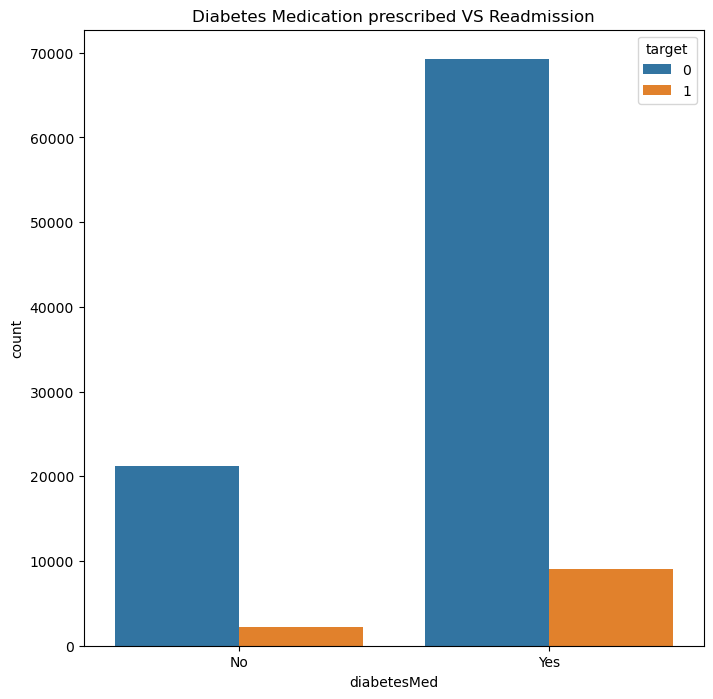

In [45]:
#diabetic medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(Diab['diabetesMed'], hue = Diab['target']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

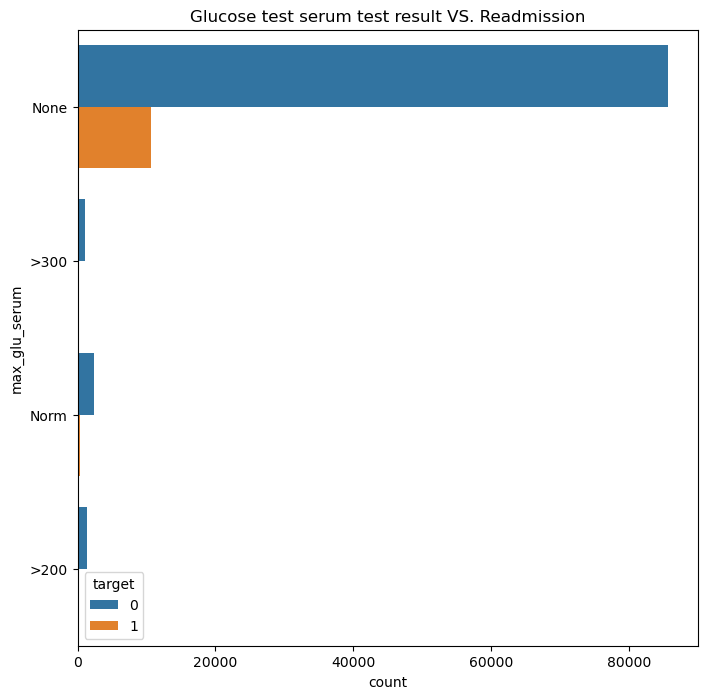

In [47]:
#max_glue_serum vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = Diab['max_glu_serum'], hue = Diab['target']).set_title('Glucose test serum test result VS. Readmission')

# A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months

'>7' :1
'>8' :1
Norm : 0 = Normal
None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

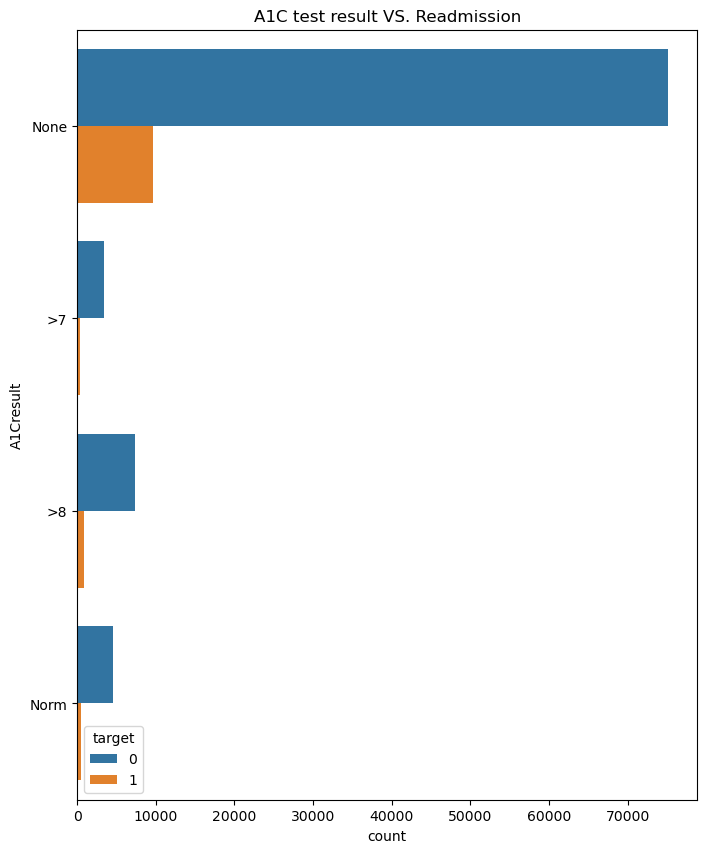

In [48]:
#a1c test result vs target
fig = plt.figure(figsize=(8,10))
sns.countplot(y= Diab['A1Cresult'], hue = Diab['target']).set_title('A1C test result VS. Readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

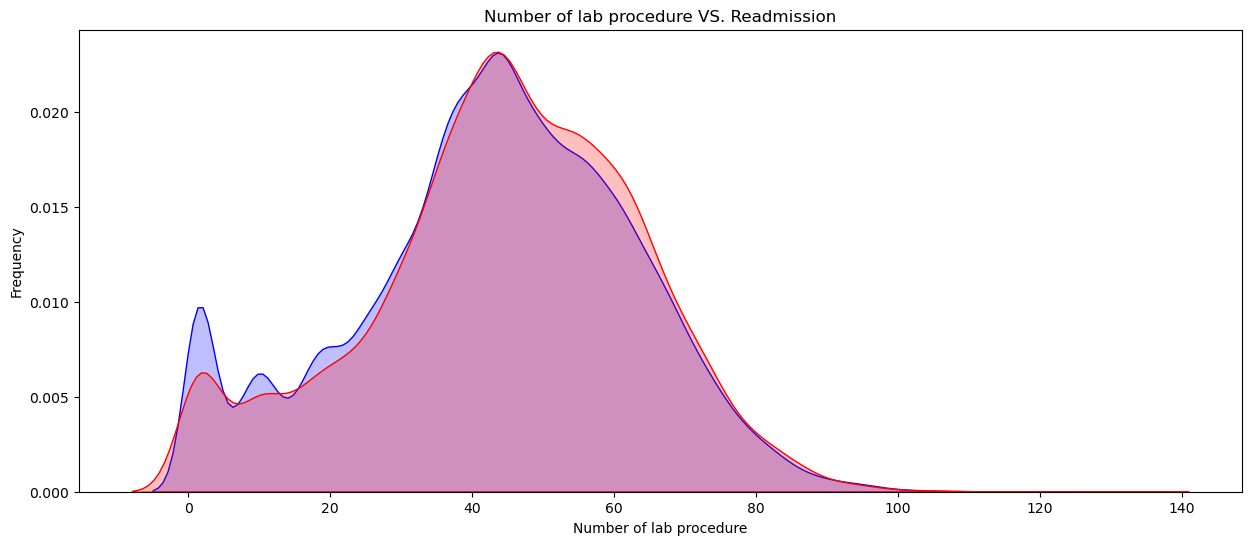

In [49]:
#no of lab procedure vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(Diab.loc[(Diab['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(Diab.loc[(Diab['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

Text(0.5, 1.0, 'admission_type_id VS. Readmission')

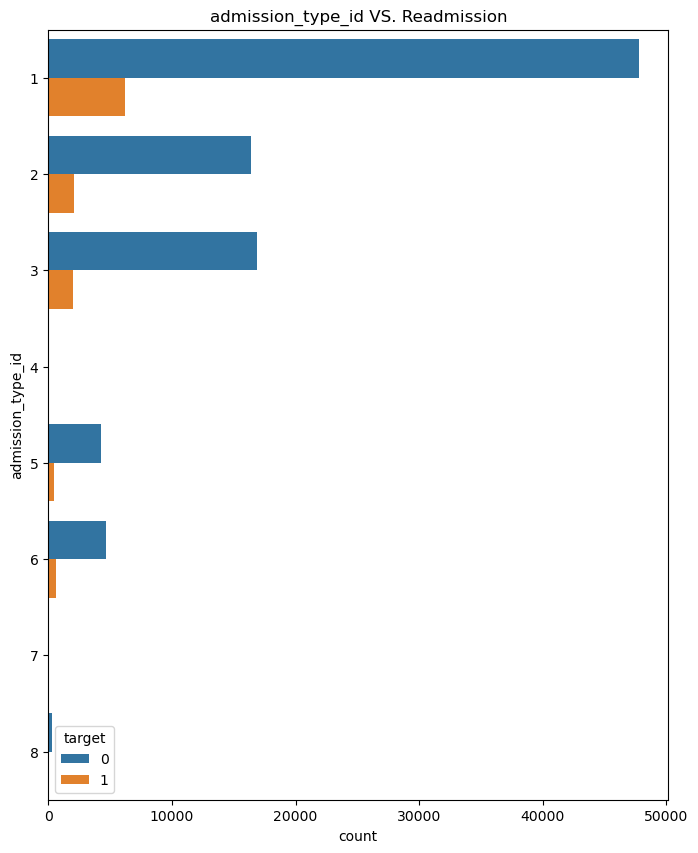

In [50]:
#admission type vs readmission
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= Diab['admission_type_id'], hue = Diab['target']).set_title('admission_type_id VS. Readmission')

Text(0.5, 1.0, 'discharge_disposition_id VS. Readmission')

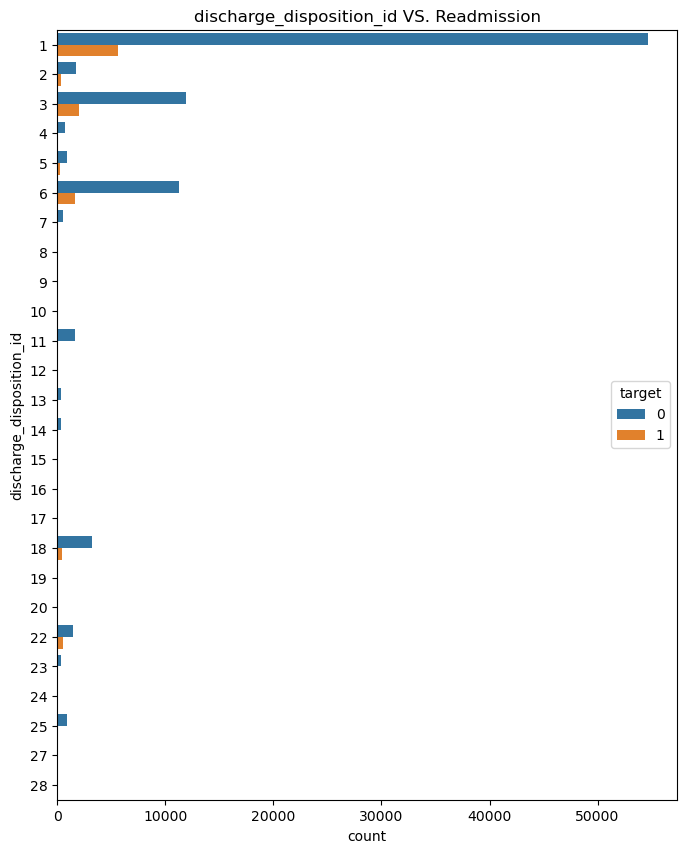

In [51]:
#discharge_disposition_id VS. Readmission
fig = plt.figure(figsize=(8,10))
sns.countplot(y= Diab['discharge_disposition_id'], hue = Diab['target']).set_title('discharge_disposition_id VS. Readmission')

# Label Encoding

In [111]:
categorical_feature=Diab.select_dtypes(include='object')
cat=categorical_feature.columns
print(cat)

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


# Removing diag_ columns bcoz it is categorical and have more levels , this is handled by grouping which is done in later part

In [112]:
cat=['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [113]:
#taking copy of dataframe
Diab_copy=Diab.copy()

# Numeric and categorical columns :  'admission_type_id','discharge_disposition_id','admission_source_id'

In [114]:
cols_cat_num=['admission_type_id','discharge_disposition_id','admission_source_id']
Diab[cols_cat_num]=Diab[cols_cat_num].astype('str')
Diab_cat=pd.get_dummies(Diab[cat+cols_cat_num],drop_first=True)

In [115]:
print(Diab_cat.columns)

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UNK', 'gender_Male', 'payer_code_CH', 'payer_code_CM',
       'payer_code_CP', 'payer_code_DM',
       ...
       'admission_source_id_20', 'admission_source_id_22',
       'admission_source_id_25', 'admission_source_id_3',
       'admission_source_id_4', 'admission_source_id_5',
       'admission_source_id_6', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9'],
      dtype='object', length=137)


In [116]:
#dropping encoded columns
for i in cat:
    Diab_copy.drop([i],axis=1,inplace=True)

In [117]:
#concating encoded columns and other columns
Diab_copy=pd.concat([Diab_copy,Diab_cat],axis=1)

# Checking diag columns

In [118]:
Diab_copy['diag_3'].isnull().sum()
Diab_copy.dropna(inplace=True)
print(Diab_copy['diag_1'].nunique())
print(Diab_copy['diag_2'].nunique())
print(Diab_copy['diag_3'].nunique())

715
743
789


# Based on icd(international classification of disease) codes we group some disease

In [119]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    Diab_copy[col] = Diab_copy[col].str.replace('E','-')
    Diab_copy[col] = Diab_copy[col].str.replace('V','-')
    condition = Diab_copy[col].str.contains('250')
    Diab_copy.loc[condition,col] = '250'

Diab_copy[diag_cols] = Diab_copy[diag_cols].astype(float)

In [120]:
# diagnosis grouping
for col in diag_cols:
    Diab_copy['temp']=np.nan
    
    condition = Diab_copy[col]==250
    #condition = Diab_copy['diag_1']==250
    Diab_copy.loc[condition,'temp']='Diabetes'
    
    condition = (Diab_copy[col]>=390) & (Diab_copy[col]<=458) | (Diab_copy[col]==785)
    Diab_copy.loc[condition,'temp']='Circulatory'
    
    condition = (Diab_copy[col]>=460) & (Diab_copy[col]<=519) | (Diab_copy[col]==786)
    Diab_copy.loc[condition,'temp']='Respiratory'
    
    condition = (Diab_copy[col]>=520) & (Diab_copy[col]<=579) | (Diab_copy[col]==787)
    Diab_copy.loc[condition,'temp']='Digestive'
    
    condition = (Diab_copy[col]>=580) & (Diab_copy[col]<=629) | (Diab_copy[col]==788)
    Diab_copy.loc[condition,'temp']='Genitourinary'
    
    condition = (Diab_copy[col]>=800) & (Diab_copy[col]<=999)
    Diab_copy.loc[condition,'temp']='Injury'
    
    condition = (Diab_copy[col]>=710) & (Diab_copy[col]<=739)
    Diab_copy.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (Diab_copy[col]>=140) & (Diab_copy[col]<=239)
    Diab_copy.loc[condition,'temp']='Neoplasms'
    
    condition = Diab_copy[col]==0
    Diab_copy.loc[condition,col]='?'
    Diab_copy['temp']=Diab_copy['temp'].fillna('Others')
    condition = Diab_copy['temp']=='0'
    Diab_copy.loc[condition,'temp']=np.nan
    Diab_copy[col]=Diab_copy['temp']
    Diab_copy.drop('temp',axis=1,inplace=True)

In [121]:
#ENCODING DIAG_ COLUMNS
Diab_cat_diag=pd.get_dummies(Diab_copy[diag_cols],drop_first=True)

#dropping encoded columns
for i in diag_cols:
    Diab_copy.drop([i],axis=1,inplace=True)

Diab_copy=pd.concat([Diab_copy,Diab_cat_diag],axis=1)

# Model Building

In [122]:
X=Diab_copy.drop(['target'],axis=1)
y=Diab_copy['target']

# Logistic Regression

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.89
Precision is 0.44
Recall is 0.01


# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.83
Precision is 0.18
Recall is 0.13


# Feature Importance for Decision Tree

                     Feature  Importance
9           number_emergency    0.016750
8          number_outpatient    0.022432
2   discharge_disposition_id    0.024975
11          number_diagnoses    0.031959
6             num_procedures    0.039332
0                        age    0.040998
4           time_in_hospital    0.051120
10          number_inpatient    0.053604
7            num_medications    0.093613
5         num_lab_procedures    0.116783


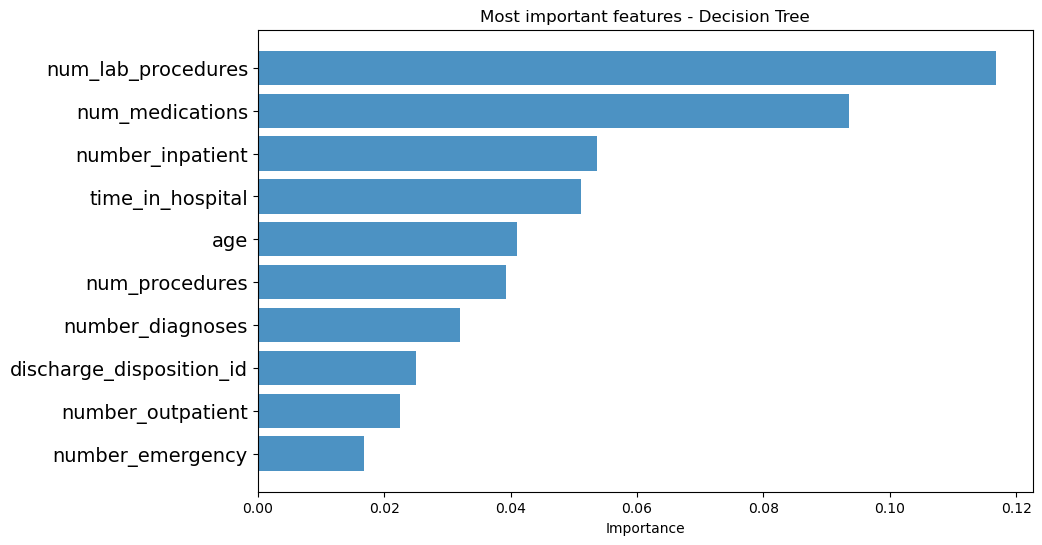

In [125]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.59
Recall is 0.01


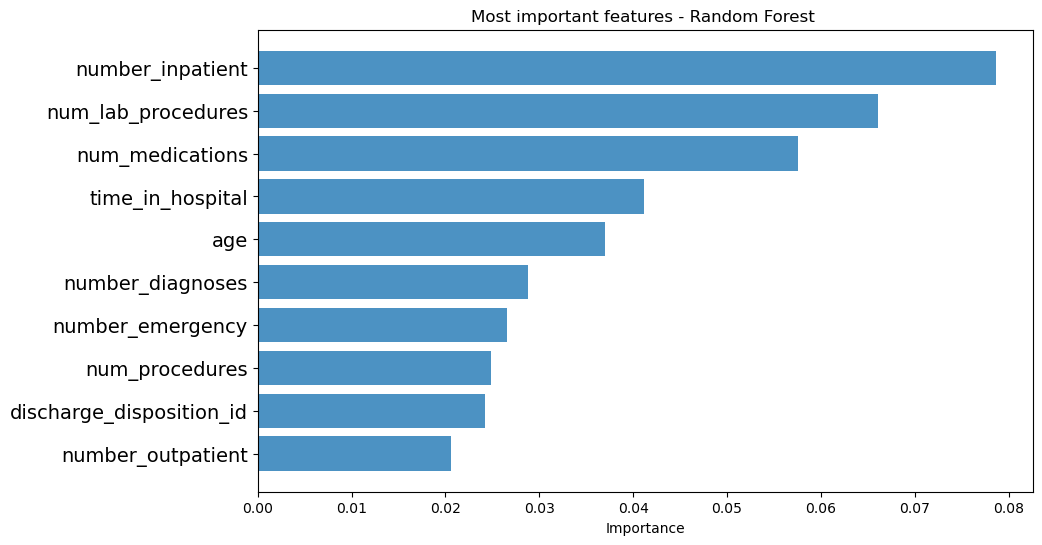

In [127]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()


# Model Comparision



# Accuracy

([<matplotlib.axis.XTick at 0x213401422e0>,
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forests')])

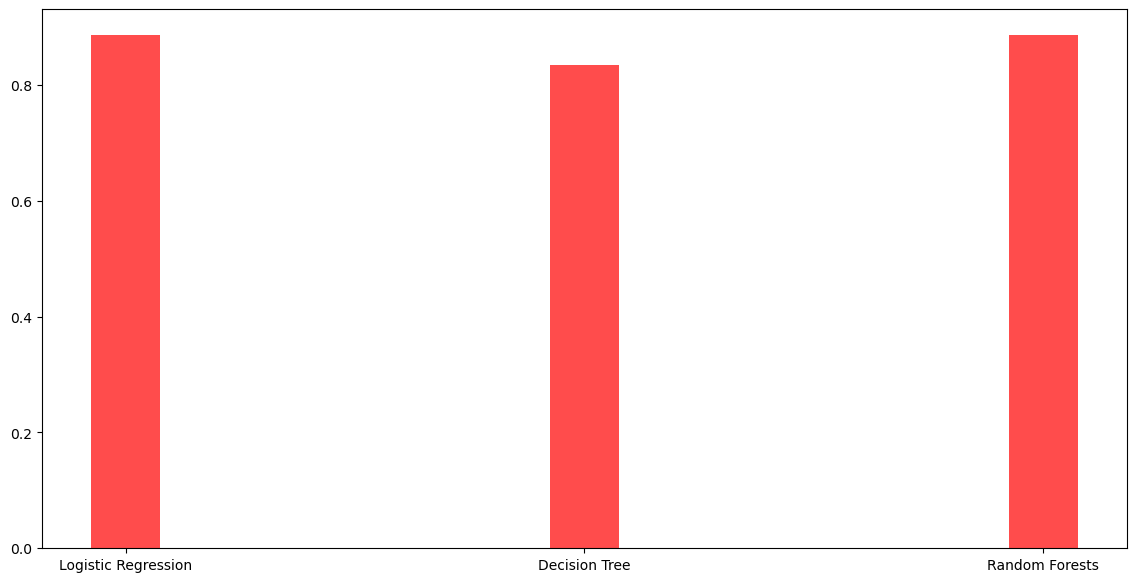

In [128]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

# Precision

([<matplotlib.axis.XTick at 0x21338240f70>,
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forests')])

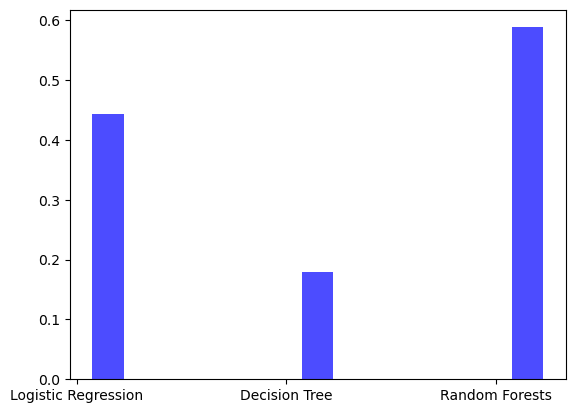

In [129]:
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_logit, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

# Recall

Text(0.5, 1.0, 'Model')

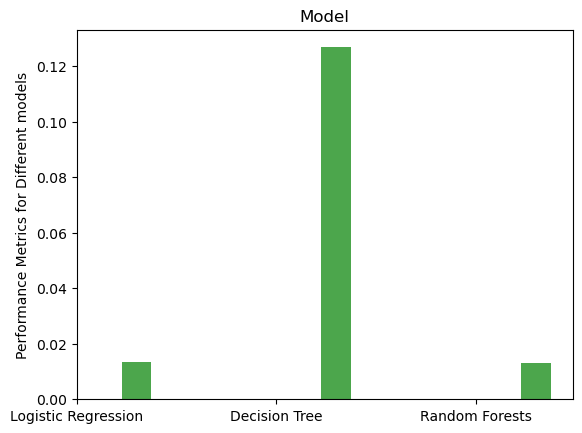

In [130]:
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_logit, recall_dtree, recall_rm, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')